In [1]:
import numpy as np
import pickle
from scipy.stats import binom
import matplotlib.pyplot as plt
import pandas as pd 
import pickle
import glob

np.random.seed(0)

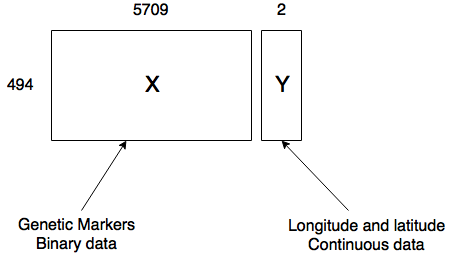

In [2]:
from IPython.display import Image
Image("../images/medgan.png")

In [3]:
data = pd.read_table('../data/data_nam.txt', sep=' ',header=0)

In [4]:
data.head()

,IndivID,PopID,Pop,Country,Continent,sex,lat,long,L1.125,L1.130,...,L677.255.553287981859,L677.259,L677.263,L677.267,L678.202,L678.206,L678.209.848101265823,L678.210,L678.214,L678.218
Chipewyan29,2012,811,Chipewyan,Canada,AMERICA,0,59.55,-107.3,0,0,...,0,0,0,0,0,0,0,1,0,0
Chipewyan31,2156,811,Chipewyan,Canada,AMERICA,0,59.55,-107.3,0,0,...,0,0,0,0,0,0,1,0,0,0
Chipewyan33,2381,811,Chipewyan,Canada,AMERICA,0,59.55,-107.3,0,0,...,0,0,0,0,0,1,0,0,0,0
Chipewyan35,2382,811,Chipewyan,Canada,AMERICA,0,59.55,-107.3,0,0,...,0,0,0,0,0,0,0,1,0,0
Chipewyan37,2383,811,Chipewyan,Canada,AMERICA,0,59.55,-107.3,0,0,...,0,1,0,0,0,0,0,1,0,0


# Analysis

Names of the different populations.

In [5]:
print('Names of the different populations:\n', np.unique(data['Pop']), '\n')
print('Number of populations: ', len(np.unique(data['Pop'])))

Names of the different populations:
 ['Ache' 'Arhuaco' 'Aymara' 'Cabecar' 'Chipewyan' 'Cree' 'Embera' 'Guarani'
 'Guaymi' 'Huilliche' 'Inga' 'Kaingang' 'Kaqchikel' 'Karitiana' 'Kogi'
 'Maya' 'Mixe' 'Mixtec' 'Ojibwa' 'Piapoco' 'Pima' 'Quechua' 'Surui'
 'TicunaArara' 'Waunana' 'Wayuu' 'Zapotec'] 

Number of populations:  27


In [6]:
print('Coordinates of the different populations:\n')
data[['Pop', 'long', 'lat']].set_index('Pop').drop_duplicates()

Coordinates of the different populations:



,long,lat
Pop,,
Chipewyan,-107.3,59.55
Cree,-102.5,50.33
Ojibwa,-81.0,46.50
Kaqchikel,-91.0,15.00
Mixtec,-97.0,17.00
Mixe,-96.0,17.00
Zapotec,-97.0,16.00
Guaymi,-82.0,8.50
Cabecar,-84.0,9.50


## PCA and Regression : Data

In [7]:
data_aux = data.copy()
data_aux = data_aux.drop(data.columns[0:6], axis=1)
x = data_aux.drop(data_aux.columns[0:2], axis=1).values
y_long = data['long'].values
y_lat = data['lat'].values

In [8]:
# Save data.
# pickle.dump(x, open('../data/data_nam_clean.matrix', 'wb'), -1)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(100).fit(x)
comp = pca.transform(x)

In [10]:
from sklearn.linear_model import LinearRegression

reg_long = LinearRegression()
reg_lat = LinearRegression()

reg_long.fit(comp, y_long)
reg_lat.fit(comp, y_lat)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
x_long = reg_long.predict(comp)
x_lat = reg_lat.predict(comp)

# Comparison

In [15]:
def get_dw_proba(x, x_gen, index):
    x_avg = np.sum(x, 0) / x.shape[0]
    x_gen_avg = np.sum(x_gen, 0) / x_gen.shape[0]
    plt.scatter(x_avg, x_gen_avg, s=10, zorder=10)
    lims = [0, .5]
    plt.xlim(lims)
    plt.ylim(lims)
    plt.plot(lims, lims, 'k-', alpha=0.5, zorder=0)
    plt.xlabel("Original Data")
    plt.ylabel("Synthetic Data")
    plt.title("Dimension-wise Probability "+str(index)+ ' epochs')
    plt.show()

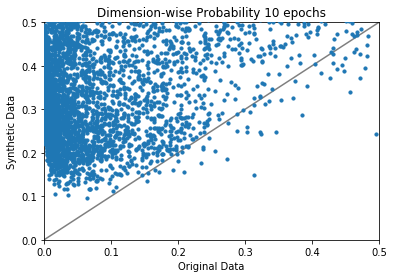

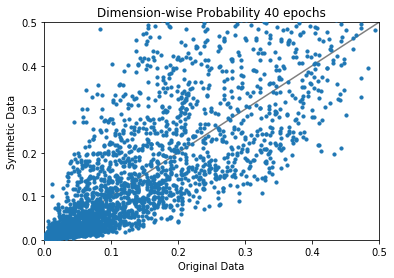

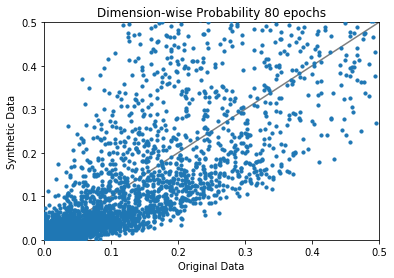

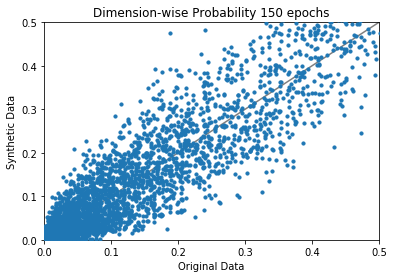

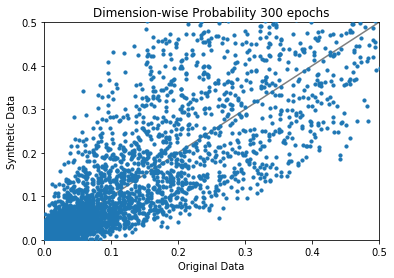

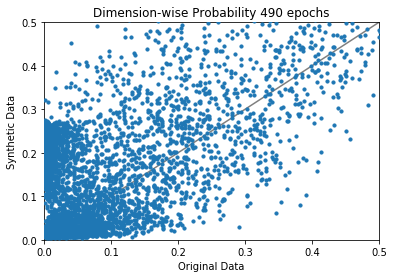

In [29]:
files = glob.glob("../generated/synthetic_data_nam_*.npy")
indices = list()
for file in files:
    indices.append(int(file.split('.npy')[0].split('_')[-1]))  
ordered_files = [x for _,x in sorted(zip(indices, files))]
indices = np.sort(np.array(indices))

for index, file in zip(indices, ordered_files):
    tmp = np.load(file)
    get_dw_proba(x, tmp, index)

plt.show()

#### Kernel Density Estimation

In [18]:
def get_reg(path):
    x_gen = np.round(np.load(path))
    comp_gen = pca.transform(x_gen)
    x_gen_long = reg_long.predict(comp_gen)
    x_gen_lat = reg_lat.predict(comp_gen)
    return x_gen_long, x_gen_lat

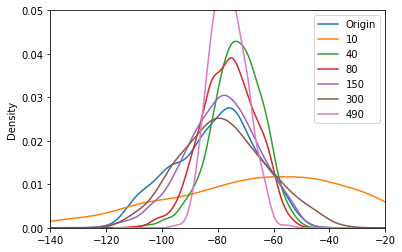

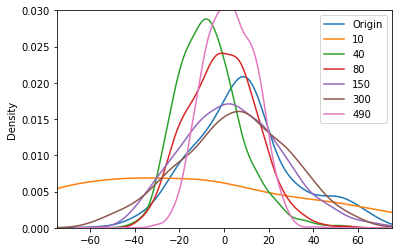

In [123]:
fig_long, ax_long = plt.subplots()
fig_lat, ax_lat = plt.subplots()
pd.DataFrame({'Origin':x_long}).plot(kind='density', ax=ax_long)
pd.DataFrame({'Origin':x_lat}).plot(kind='density', ax=ax_lat)

files = glob.glob("../generated/synthetic_data_nam_*.npy")
indices = list()
for file in files:
    indices.append(int(file.split('.npy')[0].split('_')[-1]))  
ordered_files = [x for _,x in sorted(zip(indices, files))]
indices = np.sort(np.array(indices))

for index, file in zip(indices, ordered_files):
    tmp_gen_long, tmp_gen_lat = get_reg(file)
    pd.DataFrame({index: tmp_gen_long}).plot(kind='density', ax=ax_long)
    pd.DataFrame({index: tmp_gen_lat}).plot(kind='density', ax=ax_lat)

ax_long.set_xlim([-140, -20])
ax_long.set_ylim([0, 0.05])
ax_lat.set_xlim([-75, 75]) 
ax_lat.set_ylim([0, 0.03])
    
plt.legend()
plt.show()

## PCA and Regression : Generated Data

In [44]:
x_gen = np.load('../generated/synthetic_data_nam_150.npy')
x_gen = np.round(x_gen)

In [45]:
comp_gen = pca.transform(x_gen)

In [46]:
x_gen_long = reg_long.predict(comp_gen)
x_gen_lat = reg_lat.predict(comp_gen)

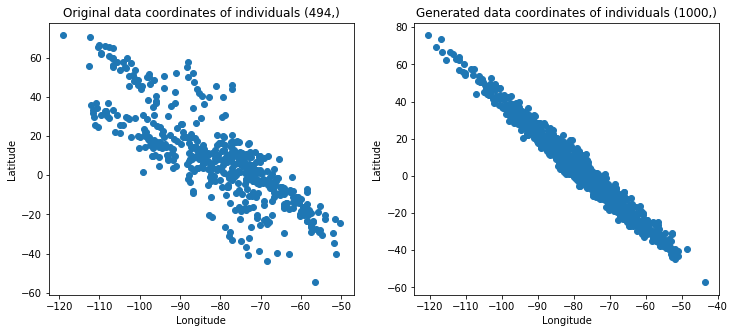

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].scatter(x_long, x_lat)
ax[0].set_title('Original data coordinates of individuals '+str(x_long.shape))
ax[0].set_xlabel("Longitude")
ax[0].set_ylabel("Latitude")

ax[1].scatter(x_gen_long, x_gen_lat)
ax[1].set_title('Generated data coordinates of individuals '+str(x_gen_long.shape))
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")
plt.show()

## Distributions

#### Normal Test

Hypothesis : X follows a Gaussian distribution.

In [48]:
from scipy.stats.mstats import normaltest

print('Longitude:\n', normaltest(x_long))
print('Generated longitude:\n', normaltest(x_gen_long))
print('Longitude:\n', normaltest(x_lat))
print('Generated latitude:\n', normaltest(x_gen_lat))

Longitude:
 NormaltestResult(statistic=21.61247148371524, pvalue=2.0272693162775423e-05)
Generated longitude:
 NormaltestResult(statistic=9.9280373064925644, pvalue=0.0069848018595034412)
Longitude:
 NormaltestResult(statistic=13.832003614168682, pvalue=0.00099178738123521055)
Generated latitude:
 NormaltestResult(statistic=12.736340199687454, pvalue=0.0017152951743614766)


#### KS Test

Hypothesis : X and Y follow the same distribution.

In [49]:
from scipy.stats import ks_2samp

print('KS Test on longitude', ks_2samp(x_long, x_gen_long))
print('KS Test on latitude' , ks_2samp(x_lat, x_gen_lat))

KS Test on longitude Ks_2sampResult(statistic=0.10181781376518217, pvalue=0.0019151457754885313)
KS Test on latitude Ks_2sampResult(statistic=0.10645344129554657, pvalue=0.0010024388707817111)


Since p-values are really low on both KS test, we can reject the hypothesis.

Either we need to draw more data or train on more epochs but results are not satisfying here.

#### Gaussian

In [50]:
from scipy.stats import norm 

Fitting gaussians to original and generated longitude.

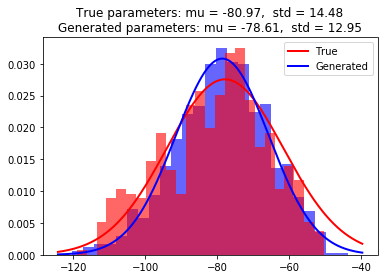

In [108]:
plt.hist(x_gen_long, bins=25, normed=True, alpha=0.6, fc=(0, 0, 1, 0.5))
plt.hist(x_long,  bins=25, normed=True, alpha=0.6, fc=(1, 0, 0, 0.5))

mu_gen_long, std_gen_long = norm.fit(x_gen_long)
xmin_long, xmax_long = plt.xlim()
vec_long = np.linspace(xmin_long, xmax_long, len(x_long))
p_gen_long = norm.pdf(vec_long, mu_gen_long, std_gen_long)
plt.plot(vec_long, p_long, 'r', linewidth=2, label='True')
plt.plot(vec_long, p_gen_long, 'b', linewidth=2, label='Generated')
title = "True parameters: mu = %.2f,  std = %.2f" % (mu_long, std_long) + "\nGenerated parameters: mu = %.2f,  std = %.2f" % (mu_gen_long, std_gen_long)
plt.legend()
plt.title(title)
plt.show()

Fitting gaussians to original and generated latitude.

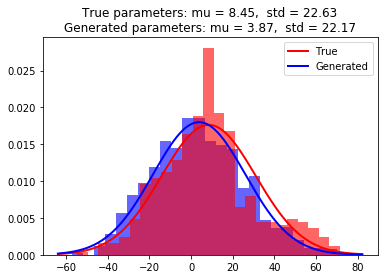

In [113]:
plt.hist(x_gen_lat, bins=25, normed=True, alpha=0.6, fc=(0, 0, 1, 0.5))
plt.hist(x_lat,  bins=25, normed=True, alpha=0.6, fc=(1, 0, 0, 0.5))

mu_lat, std_lat = norm.fit(x_lat)
xmin_lat, xmax_lat = plt.xlim()
vec_lat = np.linspace(xmin_lat, xmax_lat, len(x_lat))
p_lat = norm.pdf(vec_lat, mu_lat, std_lat)
p_gen_lat = norm.pdf(vec_lat, mu_gen_lat, std_gen_lat)
plt.plot(vec_lat, p_lat, 'r', linewidth=2, label='True')
plt.plot(vec_lat, p_gen_lat, 'b', linewidth=2, label='Generated')
title = "True parameters: mu = %.2f,  std = %.2f" % (mu_lat, std_lat) + "\nGenerated parameters: mu = %.2f,  std = %.2f" % (mu_gen_lat, std_gen_lat)
plt.title(title)
plt.legend()
plt.show()

Fitting the same gaussian to the generated latitude.

#### Multivariate Gaussian 

In [93]:
print('Parameters\n')

print(' \t \t \t Original data \t \t Generated Data')
print('Mean:')
print('Longitude \t \t', np.mean(x_long), '\t', np.mean(x_gen_long))
print('Latitude  \t \t', np.mean(x_lat), '\t \t', np.mean(x_gen_lat))

print('\nStandard deviation:')
print('Longitude \t \t', np.std(x_long), '\t \t', np.std(x_gen_lat))
print('Latitude  \t \t', np.std(x_lat), '\t \t', np.std(x_gen_lat))


Parameters 

 	 	 	 Original data 	 	 Generated Data
Mean:
Longitude 	 	 -80.9732793522 	 -78.606292465
Latitude  	 	 8.45119433198 	 	 3.8682672313

Standard deviation:
Longitude 	 	 14.4827083039 	 	 22.1713090609
Latitude  	 	 22.6304110801 	 	 22.1713090609


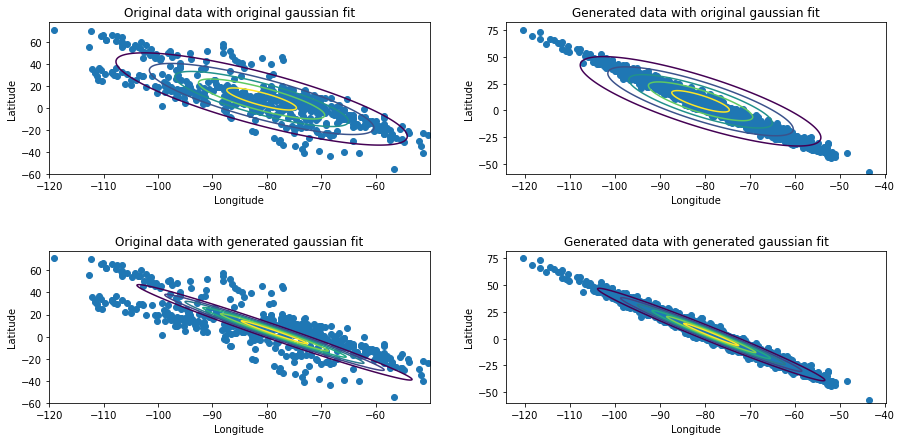

In [133]:
from matplotlib.mlab import bivariate_normal

tmp_x = np.arange(-120.0, -50.0, 0.1)
tmp_y = np.arange(-60.0, 60.0, 0.1)
X_indices, Y_indices = np.meshgrid(tmp_x, tmp_y)

fig, ax = plt.subplots(2, 2, figsize=(15, 7))

z = bivariate_normal(X_indices, Y_indices, sigmax=np.std(x_long), 
                                           sigmay=np.std(x_lat), 
                                           mux=np.mean(x_long), 
                                           muy=np.mean(x_lat), 
                                           sigmaxy=np.cov(x_long, x_lat)[0, 1])
ax[0, 0].scatter(x_long, x_lat)
ax[0, 0].contour(tmp_x, tmp_y, z)
ax[0, 0].set_title('Original data with original gaussian fit')
ax[0, 0].set_xlabel('Longitude')
ax[0, 0].set_ylabel('Latitude')

z_gen = bivariate_normal(X_indices, Y_indices, sigmax=np.std(x_gen_long), 
                                           sigmay=np.std(x_gen_lat), 
                                           mux=np.mean(x_gen_long), 
                                           muy=np.mean(x_gen_lat), 
                                           sigmaxy=np.cov(x_gen_long, x_gen_lat)[0, 1])

ax[0, 1].scatter(x_gen_long, x_gen_lat)
ax[0, 1].contour(tmp_x, tmp_y, z)
ax[0, 1].set_title('Generated data with original gaussian fit')
ax[0, 1].set_xlabel('Longitude')
ax[0, 1].set_ylabel('Latitude')

ax[1, 0].scatter(x_long, x_lat)
ax[1, 0].contour(tmp_x, tmp_y, z_gen)
ax[1, 0].set_title('Original data with generated gaussian fit')
ax[1, 0].set_xlabel('Longitude')
ax[1, 0].set_ylabel('Latitude')

ax[1, 1].scatter(x_gen_long, x_gen_lat)
ax[1, 1].contour(tmp_x, tmp_y, z_gen)
ax[1, 1].set_title('Generated data with generated gaussian fit')
ax[1, 1].set_xlabel('Longitude')
ax[1, 1].set_ylabel('Latitude')

plt.subplots_adjust(hspace=.5)
plt.show()